**Hear Disease Menggunakan Neural Network**

**1. Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**2. Load Dataset**

In [2]:
dataset = pd.read_csv('heart.csv')

In [3]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Data Exploratory**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

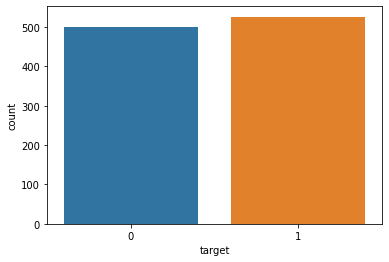

In [5]:
y = dataset['target']
sns.countplot(y)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thal', ylabel='target'>

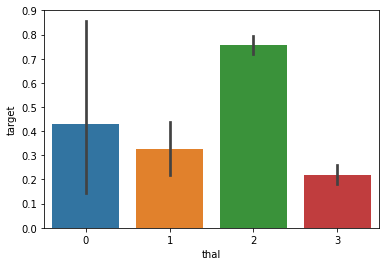

In [6]:
sns.barplot(dataset['thal'], y)

**3. Train Test Split**

In [7]:
from sklearn.model_selection import train_test_split

X = dataset.drop("target", axis=1).values
y = dataset['target']

In [8]:
X

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [9]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

**4.a) Model Fitting - Machine Learning**

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [12]:
lr = LogisticRegression()
knn = KNeighborsClassifier()

lr.fit(X_train, y_train)
knn.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier()

**5.a) Metric Evaluation**

In [13]:
from sklearn.metrics import classification_report, accuracy_score

In [14]:
y_pred_lr_train = lr.predict(X_train)
y_pred_lr_test = lr.predict(X_test)

y_pred_knn_train = knn.predict(X_train)
y_pred_knn_test = knn.predict(X_test)

In [15]:
print("Accuracy (train) Logistic Regression: ", accuracy_score(y_train, y_pred_lr_train))
print("Accuracy (test) Logistic Regression: ", accuracy_score(y_test, y_pred_lr_test))

print("Accuracy (train) K-NN: ", accuracy_score(y_train, y_pred_knn_train))
print("Accuracy (test) K-NN: ", accuracy_score(y_test, y_pred_knn_test))

Accuracy (train) Logistic Regression:  0.8439024390243902
Accuracy (test) Logistic Regression:  0.8390243902439024
Accuracy (train) K-NN:  0.9195121951219513
Accuracy (test) K-NN:  0.7560975609756098


berdsaarkan evaluasi logistic regression (lr), model lr mengalami underfitting, yaitu nilai test > train, 88.52 % > 83.47 % 

**4.b) Model fitting - Neural Network**

In [16]:
''' Import library '''
from keras.models import Sequential # Sequential berarti proses fully connected itu dilakuakn secara terurut
from keras.layers import Dense # istilah hidden layer itu dinamakans sebagai Dense

In [17]:
print("input dimension: ", X.shape)
print("output dimension: ", y.shape)

input dimension:  (1025, 13)
output dimension:  (1025,)


In [39]:
''' Build model '''
# 2 - 4 -8 16 32 64..
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=13)) # untuk setiap Dense, common activation = Relu
model.add(Dense(16,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1, activation='sigmoid')) #untuk setiap output classification: sigmoid (binary) / softmax (multi-binary)

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 16)                224       
                                                                 
 dense_15 (Dense)            (None, 16)                272       
                                                                 
 dense_16 (Dense)            (None, 32)                544       
                                                                 
 dense_17 (Dense)            (None, 32)                1056      
                                                                 
 dense_18 (Dense)            (None, 8)                 264       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,369
Trainable params: 2,369
Non-traina

In [41]:
''' Optimizer model '''
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
history = model.fit(X_train, y_train, epochs=300)

Epoch 1/300
26/26 [==============================] - 2s 3ms/step - loss: 2.8836 - accuracy: 0.5427
Epoch 2/300
26/26 [==============================] - 0s 2ms/step - loss: 0.6253 - accuracy: 0.6512
Epoch 3/300
26/26 [==============================] - 0s 3ms/step - loss: 0.6159 - accuracy: 0.6610
Epoch 4/300
26/26 [==============================] - 0s 2ms/step - loss: 0.6141 - accuracy: 0.6659
Epoch 5/300
26/26 [==============================] - 0s 2ms/step - loss: 0.5983 - accuracy: 0.6768
Epoch 6/300
26/26 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.6805
Epoch 7/300
26/26 [==============================] - 0s 3ms/step - loss: 0.5882 - accuracy: 0.6963
Epoch 8/300
26/26 [==============================] - 0s 3ms/step - loss: 0.5817 - accuracy: 0.6878
Epoch 9/300
26/26 [==============================] - 0s 3ms/step - loss: 0.5803 - accuracy: 0.6963
Epoch 10/300
26/26 [==============================] - 0s 2ms/step - loss: 0.5792 - accuracy: 0.6988
Epoch 11/

In [43]:
y_pred_nn_train = model.predict(X_train)
y_pred_nn_test = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [44]:
rounded_y_train = [round(x[0]) for x in y_pred_nn_train]
rounded_y_test = [round(x[0]) for x in y_pred_nn_test]

In [45]:
print("Accuracy (train) Neural Network: ", accuracy_score(y_train, rounded_y_train))
print("Accuracy (test) Neural Network: ", accuracy_score(y_test, rounded_y_test))

Accuracy (train) Neural Network:  0.9231707317073171
Accuracy (test) Neural Network:  0.8878048780487805


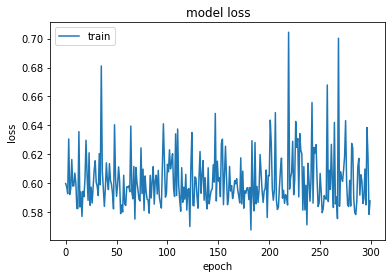

In [ ]:


import keras
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

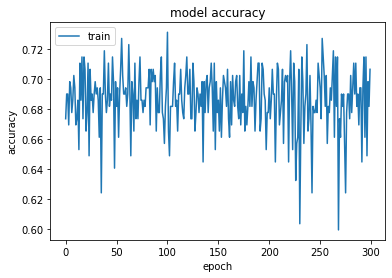

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()